## Linear Discriminant Analysis

```
https://sebastianraschka.com/Articles/2014_python_lda.html
```
#### Filename: LDA_MyCode_v1.ipynb
##### Version Log:
```
v1: 29-Jun-2018: Copy of LDA-v1.ipynb; Trying to add Sonds data with 0 (Sad) and 1 (Happy) y-values
```

### Reading in the dataset

In [121]:
import pandas as pd
fileNameNoPrefix = "LibrosaReduced120Sec577FeatsCSVExtract_10Test_v2"
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [122]:
# note this LDA code uses 1.0 and 2.0 not 0.0 and 1.0
# replace label column 1.0 to 0.0 and 2.0 to 1.0
df = df.replace({"label": 1.0}, 2.0)
df = df.replace({"label": 0.0}, 1.0)

In [123]:
df.tail()

f15       f22       f35        f50      f171      f172  \
101809  2.801958  0.039977  0.505372  27.208478  0.000928  0.356901   
101810  1.344070  0.024789  0.543512  22.108266  0.001397  0.335552   
101811 -0.901763  0.023915  0.540817  17.279541  0.001030  0.315968   
101812 -2.587648  0.014971  0.414233  19.439070  0.000726  0.289393   
101813 -0.343266  0.013599  0.189333  18.146959  0.000721  0.281381   

               f173         f174       f181      f182         f183      f188  \
101809  1914.842686  2649.195825  31.018052  0.006338  4769.604492 -0.034905   
101810  2181.109965  2829.135007  29.445522  0.011122  5620.166016  0.079807   
101811  2148.754154  2898.576517  28.521853  0.008373  5900.097656  0.126187   
101812  1870.807580  2707.080589  30.657294  0.004770  4705.004883  0.147660   
101813  1536.562743  2417.517170  15.925657  0.003345  2885.449219  0.058447   

            f191      f198  label  
101809  0.016078  0.562028    2.0  
101810  0.030462  0.563180    2.0  
101811 -0.003306  0.564334    2.0  
101812 -0.013021  0.565490    2.0  
101813  0.023853  0.566648    2.0

In [124]:
df.head()

f15       f22       f35        f50          f171      f172  \
0  10.805733  0.138652  0.345499   0.399426  7.819060e-08  0.036449   
1   6.043677  0.098696  0.327590   0.659695  2.102684e-08  0.046942   
2   0.487372  0.181770  0.564931   4.630270  2.130511e-08  0.061447   
3  -2.085181  0.638889  0.721375  14.276759  1.082407e-07  0.069760   
4  -0.122490  0.658897  0.867472   4.402166  1.129980e-07  0.075562   

          f173         f174       f181      f182         f183      f188  \
0  1811.974847  2013.129593  28.782844  0.005056  3649.877930 -0.007894   
1  2107.522320  2332.904752  32.349502  0.012425  4532.739258  0.087268   
2  3532.599182  3121.556378  45.126730  0.044541  7601.220703  0.108390   
3  3912.786980  3203.405212  44.350014  0.042116  7805.786133  0.045048   
4  3512.906084  3219.926870  46.017108  0.020298  7568.920898  0.037600   

       f191      f198  label  
0 -0.022617  0.556724    1.0  
1 -0.031726  0.558091    1.0  
2 -0.046036  0.559452    1.0  
3 -0.004240  0.560805    1.0  
4  0.008193  0.562151    1.0

In [125]:
df.columns

Index(['f15', 'f22', 'f35', 'f50', 'f171', 'f172', 'f173', 'f174', 'f181',
       'f182', 'f183', 'f188', 'f191', 'f198', 'label'],
      dtype='object')

In [126]:
feature_dict = {i:label for i,label in zip(
                range(len(df.columns)),
                  (df.columns))}
feature_dict

{0: 'f15',
 1: 'f22',
 2: 'f35',
 3: 'f50',
 4: 'f171',
 5: 'f172',
 6: 'f173',
 7: 'f174',
 8: 'f181',
 9: 'f182',
 10: 'f183',
 11: 'f188',
 12: 'f191',
 13: 'f198',
 14: 'label'}

##### ```
Since it is more convenient to work with numerical values, we will use the LabelEncode from the scikit-learn library to convert the class labels into numbers: 1, 2, and 3.
```

In [127]:
df.describe().transpose()

count         mean          std           min           25%  \
f15    101814.0     1.779785     9.128891 -4.467823e+01 -3.778956e+00   
f22    101814.0     0.346161     0.318232  0.000000e+00  8.747833e-02   
f35    101814.0     0.490362     0.264740  0.000000e+00  2.680245e-01   
f50    101814.0    27.486479    87.624309  0.000000e+00  7.663812e-01   
f171   101814.0     0.001541     0.006056  0.000000e+00  9.078866e-07   
f172   101814.0     0.165816     0.107447  0.000000e+00  8.803906e-02   
f173   101814.0  2349.397894   806.292429  0.000000e+00  1.822459e+03   
f174   101814.0  2394.712124   604.693881  0.000000e+00  1.986386e+03   
f181   101814.0    34.264114     5.026245  6.109696e+00  3.098764e+01   
f182   101814.0     0.024761     0.059950  5.119912e-07  1.956009e-03   
f183   101814.0  5043.816237  1786.766655  0.000000e+00  3.671411e+03   
f188   101814.0    -0.009270     0.105303 -3.871124e-01 -7.434333e-02   
f191   101814.0     0.001906     0.026455 -1.100176e-01 -1.537533e-02   
f198   101814.0     0.477430     0.133717  7.741887e-02  3.925453e-01   
label  101814.0     1.492408     0.499945  1.000000e+00  1.000000e+00   

               50%          75%           max  
f15       1.873842     7.338013     62.190343  
f22       0.231522     0.528512      1.000000  
f35       0.457323     0.680040      1.000000  
f50       3.926613    17.282337   2969.637576  
f171      0.000061     0.000647      0.288562  
f172      0.141291     0.234429      0.757764  
f173   2238.004907  2760.175423   7933.297452  
f174   2475.278028  2848.625569   4183.329825  
f181     33.361648    36.500986     54.914765  
f182      0.007749     0.024407      1.000001  
f183   4888.037109  6395.361328  10088.305664  
f188     -0.008737     0.057505      0.394379  
f191      0.001644     0.019058      0.170405  
f198      0.477878     0.566719      0.943266  
label     1.000000     2.000000      2.000000

In [128]:
# # get a list of columns
# cols = list(df)
# # move the column to head of list using index, pop and insert
# cols.insert(20, cols.pop(cols.index('f0')))
# cols

In [129]:
# df = df.ix[:, cols]
# df

In [130]:
from sklearn.preprocessing import LabelEncoder

# X = df.drop('label',axis=1).as_matrix(columns=None)
x_data = df.drop('label',axis=1)
y_data = df['label'].values

# enc = LabelEncoder()
# label_encoder = enc.fit(y)
# y = label_encoder.transform(y) + 1

# should be only 1 (sad) and 2 (happy)
label_dict = {1: 'red', 2:'blue', 3:'green'}

In [131]:
type(y_data)

numpy.ndarray

In [132]:
# y_data = [2 if a==1.0 else a for a in y_data]
# y_data = [1 if a==0.0 else a for a in y_data]

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.00001,
                                                    random_state=101)


import sklearn as sk
# scaler = sk.preprocessing.MinMaxScaler()
# scaler = sk.preprocessing.StandardScaler()
scaler = sk.preprocessing.MaxAbsScaler()
# scaler = sk.preprocessing.QuantileTransformer()
# scaler = sk.preprocessing.Normalizer()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train),columns = X_train.columns,index=X_train.index)
X_test  = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)
X = X_train.as_matrix(columns=None)
y = y_train
# X = x_data.as_matrix(columns=None)
# y = y_data

In [134]:
type(X)

numpy.ndarray

In [135]:
X.shape

(101812, 14)

In [136]:
X

array([[-0.0143,  0.0265,  0.3703, ..., -0.2681,  0.2776,  0.4157],
       [-0.1041,  0.283 ,  1.    , ...,  0.6934,  0.1983,  0.5126],
       [-0.0846,  0.2159,  0.7183, ..., -0.0592,  0.0362,  0.4829],
       ...,
       [-0.0134,  0.2954,  0.7471, ...,  0.1416, -0.0332,  0.4777],
       [ 0.0627,  0.2205,  0.3182, ..., -0.0694,  0.0254,  0.4958],
       [ 0.2037,  0.0891,  0.48  , ...,  0.3711,  0.1202,  0.5857]])

In [137]:
set(y)

{1.0, 2.0}

In [138]:
y

array([1., 1., 2., ..., 2., 2., 1.])

In [139]:
# for y Replace 1 to 2 and 0 to 1
# example:
# >>> a=[1,2,3,1,3,2,1,1]
# >>> [4 if x==1 else x for x in a]
# [4, 2, 3, 4, 3, 2, 4, 4]
# y = [2 if a==1.0 else a for a in y]
# y = [1 if a==0.0 else a for a in y]

In [140]:
set(y)

{1.0, 2.0}

### Histograms and feature selection
```
Just to get a rough idea how the samples of our three classes ω1, ω2 and ω3 are distributed, let us visualize the distributions of the four different features in 1-dimensional histograms.
```

In [141]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

In [142]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

min_b:-1
max_b:1
min_b:0
max_b:1
min_b:0
max_b:1


C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


min_b:0
max_b:1


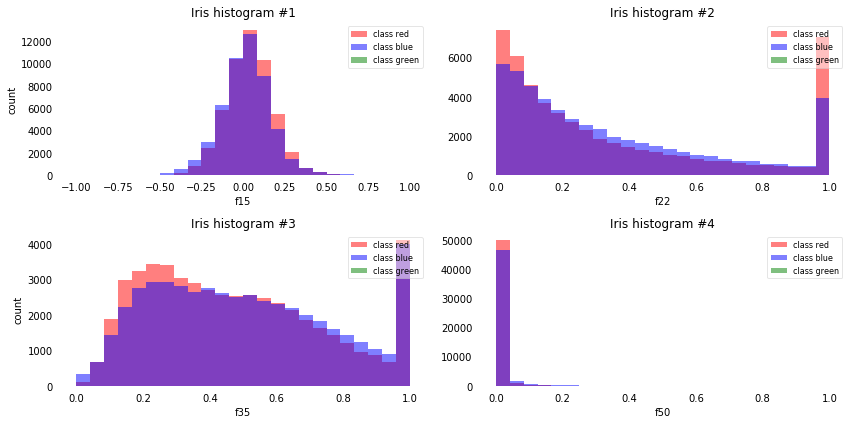

In [143]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)
    print("min_b:" + str(min_b))
    print("max_b:" + str(max_b))

    # plottling the histograms
    for lab,col in zip(range(1,4), ('red', 'blue', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

### LDA in 5 steps
```
After we went through several preparation steps, our data is finally ready for the actual LDA. In practice, LDA for dimensionality reduction would be just another preprocessing step for a typical machine learning or pattern classification task.

Step 1: Computing the d-dimensional mean vectors

In this first step, we will start off with a simple computation of the mean vectors mmi
, (i=1,2,3) of the 3 different flower classes:
```

In [144]:
X.shape

(101812, 14)

In [145]:
n_feats = X.shape[1]
n_feats

14

In [146]:
# this will work only for Square matrix
# np.linalg.det(X)

In [147]:
# y.shape

In [148]:
print("min of y:" + str(int(min(y))))
print("min of y:" + str(int(max(y))))

min of y:1
min of y:2


In [149]:
np.set_printoptions(precision=4) # changing this from 4 to 20

In [150]:
X[y==2.0]

array([[-0.0846,  0.2159,  0.7183, ..., -0.0592,  0.0362,  0.4829],
       [ 0.0152,  0.3495,  0.6538, ..., -0.0049,  0.0208,  0.4846],
       [ 0.043 ,  0.4093,  0.5776, ...,  0.0238, -0.2368,  0.5444],
       ...,
       [ 0.0285,  0.5909,  0.5904, ..., -0.2792,  0.1155,  0.4324],
       [-0.0134,  0.2954,  0.7471, ...,  0.1416, -0.0332,  0.4777],
       [ 0.0627,  0.2205,  0.3182, ..., -0.0694,  0.0254,  0.4958]])

In [151]:
np.mean(X[y==2.], axis=0)

array([ 0.0175,  0.3386,  0.502 ,  0.0127,  0.0094,  0.2439,  0.3087,
        0.579 ,  0.6073,  0.0338,  0.5189, -0.009 ,  0.0067,  0.4852])

In [152]:
np.mean(X[y==2], axis=0)

array([ 0.0175,  0.3386,  0.502 ,  0.0127,  0.0094,  0.2439,  0.3087,
        0.579 ,  0.6073,  0.0338,  0.5189, -0.009 ,  0.0067,  0.4852])

In [153]:
mean_vectors = []
for cl in range(int(min(y)),(int(max(y))+1)):
    print(cl)
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

1
Mean Vector class 1: [ 0.0394  0.3535  0.479   0.006   0.0014  0.1945  0.284   0.5661  0.6401
  0.016   0.4816 -0.0376  0.0155  0.5264]

2
Mean Vector class 2: [ 0.0175  0.3386  0.502   0.0127  0.0094  0.2439  0.3087  0.579   0.6073
  0.0338  0.5189 -0.009   0.0067  0.4852]



In [154]:
len(mean_vectors)

2

### Step 2: Computing the Scatter Matrices
```
Now, we will compute the two 4x4-dimensional matrices: The within-class and the between-class scatter matrix.
2.1 Within-class scatter matrix SW
```

In [155]:
import random
S_W = np.zeros((n_feats,n_feats))
for cl,mv in zip(range(1,3), mean_vectors):
    class_sc_mat = np.zeros((n_feats,n_feats))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(n_feats,1), mv.reshape(n_feats,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
        # Add small random value to avoid singularity
        # class_sc_mat += (random.random()/1000)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)
# this will work only for Square matrix
print("S_W shape:" + str(S_W.shape))
print("S_W Determinant value:" + str(np.linalg.det(S_W)))
# if (np.linalg.det(S_W) == 0.0):
#     print("Determinant is ZERO, singularity issue, can't proceed further")
#     raise Exception("Singularity Issue")

within-class Scatter Matrix:
 [[ 2.1816e+03 -4.1250e+02 -2.9120e+02  3.4029e+00  1.0021e+01  3.2743e+02
   4.6584e+01  3.1083e+02 -1.5018e+02  2.5758e+01  1.5472e+02  1.3497e+02
  -2.4865e-01 -4.3530e+01]
 [-4.1250e+02  1.0305e+04  3.5653e+03  1.4875e+01  4.6910e+01  2.1385e+02
   3.2650e+02  5.3517e+02 -2.0831e+02  1.3022e+02  5.7547e+02  3.8834e+02
  -5.3455e+02 -2.2797e+02]
 [-2.9120e+02  3.5653e+03  7.1222e+03  1.1603e+01  1.9064e+01  2.1685e+02
   1.7976e+02  2.1645e+02 -7.6485e+01  5.6135e+01  2.8228e+02  2.0983e+03
   5.8653e+02  2.2763e+02]
 [ 3.4029e+00  1.4875e+01  1.1603e+01  8.7500e+01  9.1186e+00  1.4710e+02
   8.5578e+00  5.1271e+01 -2.6927e+01  3.3777e+00  4.2647e+01  7.3783e+00
  -1.0712e+00 -1.4960e+01]
 [ 1.0021e+01  4.6910e+01  1.9064e+01  9.1186e+00  4.3197e+01  7.3050e+01
   7.7324e+01  8.7429e+01 -3.0149e+01  3.0409e+01  1.2245e+02  1.3509e+00
   8.7655e-01 -1.3070e+00]
 [ 3.2743e+02  2.1385e+02  2.1685e+02  1.4710e+02  7.3050e+01  1.9848e+03
   8.1070e+01  2.7897

### 2.1 b
### 2.2 Between-class scatter matrix SB

In [156]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((n_feats,n_feats))
for i,mean_vec in enumerate(mean_vectors): 
    print("i:" + str(i))
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(n_feats,1) # make column vector
    overall_mean = overall_mean.reshape(n_feats,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    # Add small random value to avoid singularity
    # S_B += (random.random()/1)

print('between-class Scatter Matrix:\n', S_B)
# this will work only for Square matrix
print("S_B shape:" + str(S_B.shape))
print("S_B Determinant value:" + str(np.linalg.det(S_B)))
# if (np.linalg.det(S_B) == 0.0):
#     print("Determinant is ZERO, singularity issue, can't proceed further")
#     raise Exception("Singularity Issue")

i:0
i:1
between-class Scatter Matrix:
 [[ 12.2089   8.3195 -12.8313  -3.7359  -4.4746 -27.5605 -13.7351  -7.1882
   18.2383  -9.923  -20.8184 -15.9127   4.8983  22.9621]
 [  8.3195   5.6692  -8.7437  -2.5458  -3.0492 -18.7806  -9.3595  -4.8983
   12.4282  -6.7619 -14.1863 -10.8434   3.3378  15.6471]
 [-12.8313  -8.7437  13.4855   3.9264   4.7028  28.9656  14.4353   7.5546
  -19.1682  10.429   21.8797  16.724   -5.148  -24.1328]
 [ -3.7359  -2.5458   3.9264   1.1432   1.3692   8.4335   4.203    2.1996
   -5.5809   3.0365   6.3704   4.8693  -1.4989  -7.0264]
 [ -4.4746  -3.0492   4.7028   1.3692   1.64    10.1011   5.034    2.6345
   -6.6845   3.6369   7.6301   5.8321  -1.7952  -8.4157]
 [-27.5605 -18.7806  28.9656   8.4335  10.1011  62.2154  31.0057  16.2267
  -41.1714  22.4004  46.9956  35.9215 -11.0574 -51.8349]
 [-13.7351  -9.3595  14.4353   4.203    5.034   31.0057  15.4521   8.0867
  -20.5182  11.1635  23.4208  17.9019  -5.5106 -25.8325]
 [ -7.1882  -4.8983   7.5546   2.1996   2.63

In [157]:
S_B.shape

(14, 14)

In [158]:
S_W.shape

(14, 14)

### Step 3: Solving the generalized eigenvalue problem for the matrix S−1WSB

In [159]:
np.linalg.inv(S_W)

array([[ 5.0386e-04,  2.0267e-05,  2.1990e-05,  1.7599e-04,  1.1080e-04,
        -8.4137e-05, -6.0706e-05, -2.3527e-04,  3.5378e-05, -6.9423e-05,
         1.7807e-04, -2.3948e-05,  1.9045e-06, -3.3030e-06],
       [ 2.0267e-05,  1.2609e-04, -6.9214e-05,  1.6669e-05, -4.4510e-05,
        -3.0874e-06, -2.2849e-05, -3.9703e-05,  1.5994e-05, -1.6857e-05,
         2.7724e-05,  1.2816e-05,  4.6055e-05,  1.6628e-05],
       [ 2.1990e-05, -6.9214e-05,  2.0014e-04,  1.9180e-05,  5.3052e-05,
        -2.0654e-05, -2.7158e-05, -2.4487e-05,  3.3268e-07, -9.6091e-06,
         2.3685e-05, -5.6846e-05, -6.8179e-05, -2.5019e-05],
       [ 1.7599e-04,  1.6669e-05,  1.9180e-05,  1.3418e-02, -1.2136e-03,
        -9.8812e-04,  8.1976e-04, -1.8780e-04, -7.5665e-05, -2.5442e-04,
        -3.4218e-04, -4.6735e-05, -3.7083e-06,  1.5618e-04],
       [ 1.1080e-04, -4.4510e-05,  5.3052e-05, -1.2136e-03,  2.9450e-02,
        -9.0594e-04, -2.3222e-03, -4.9384e-04,  2.4097e-04, -1.4223e-03,
         6.4082e-04, -2.28

In [160]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(n_feats,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.1031]
 [ 0.0443]
 [-0.0331]
 [-0.1715]
 [-0.822 ]
 [-0.1648]
 [ 0.0035]
 [ 0.307 ]
 [ 0.2118]
 [-0.1108]
 [-0.2501]
 [-0.0229]
 [ 0.0308]
 [ 0.1966]]
Eigenvalue 1: 1.45e-01

Eigenvector 2: 
[[ 0.1901]
 [ 0.092 ]
 [-0.0063]
 [-0.3031]
 [-0.2111]
 [-0.0291]
 [-0.0915]
 [ 0.2289]
 [ 0.1072]
 [-0.0071]
 [ 0.5786]
 [-0.0119]
 [ 0.0127]
 [ 0.179 ]]
Eigenvalue 2: -3.06e-17

Eigenvector 3: 
[[ 0.1901]
 [ 0.092 ]
 [-0.0063]
 [-0.3031]
 [-0.2111]
 [-0.0291]
 [-0.0915]
 [ 0.2289]
 [ 0.1072]
 [-0.0071]
 [ 0.5786]
 [-0.0119]
 [ 0.0127]
 [ 0.179 ]]
Eigenvalue 3: -3.06e-17

Eigenvector 4: 
[[-0.133 ]
 [-0.1578]
 [-0.0416]
 [-0.4294]
 [-0.802 ]
 [ 0.035 ]
 [-0.1765]
 [ 0.1863]
 [-0.0063]
 [ 0.1602]
 [ 0.0561]
 [-0.007 ]
 [ 0.0128]
 [-0.0093]]
Eigenvalue 4: 1.30e-17

Eigenvector 5: 
[[-0.133 ]
 [-0.1578]
 [-0.0416]
 [-0.4294]
 [-0.802 ]
 [ 0.035 ]
 [-0.1765]
 [ 0.1863]
 [-0.0063]
 [ 0.1602]
 [ 0.0561]
 [-0.007 ]
 [ 0.0128]
 [-0.0093]]
Eigenvalue 5: 1.30e-17

Eigenvector 6: 
[[ 0.0

In [161]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(n_feats,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


### Step 4: Selecting linear discriminants for the new feature subspace

In [162]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [163]:
eig_pairs

[(0.14532420684647684,
  array([ 0.1031+0.j,  0.0443+0.j, -0.0331+0.j, -0.1715+0.j, -0.822 +0.j,
         -0.1648+0.j,  0.0035+0.j,  0.307 +0.j,  0.2118+0.j, -0.1108+0.j,
         -0.2501+0.j, -0.0229+0.j,  0.0308+0.j,  0.1966+0.j])),
 (3.5264760758330206e-17,
  array([ 0.1901-0.0313j,  0.092 -0.0722j, -0.0063-0.0183j, -0.3031+0.0023j,
         -0.2111-0.3311j, -0.0291-0.0668j, -0.0915+0.3505j,  0.2289+0.3191j,
          0.1072+0.1572j, -0.0071+0.0435j,  0.5786+0.j    , -0.0119-0.0113j,
          0.0127+0.0162j,  0.179 +0.0805j])),
 (3.5264760758330206e-17,
  array([ 0.1901+0.0313j,  0.092 +0.0722j, -0.0063+0.0183j, -0.3031-0.0023j,
         -0.2111+0.3311j, -0.0291+0.0668j, -0.0915-0.3505j,  0.2289-0.3191j,
          0.1072-0.1572j, -0.0071-0.0435j,  0.5786-0.j    , -0.0119+0.0113j,
          0.0127-0.0162j,  0.179 -0.0805j])),
 (1.3456635765566998e-17,
  array([-0.133 -5.4073e-02j, -0.1578-7.0122e-02j, -0.0416-6.3544e-03j,
         -0.4294+6.5248e-02j, -0.802 +0.0000e+00j,  0.035 -7.

In [164]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

0.14532420684647684
3.5264760758330206e-17
3.5264760758330206e-17
1.3456635765566998e-17
1.3456635765566998e-17
9.857646647974094e-18
9.857646647974094e-18
7.594741552224209e-18
3.188838529774277e-18
2.4386247038658794e-18
2.4386247038658794e-18
1.1106029164724148e-18
1.1106029164724148e-18
2.0295079885245528e-19


In [165]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%
eigenvalue 13: 0.00%
eigenvalue 14: 0.00%


In [166]:
W = np.hstack((eig_pairs[0][1].reshape(n_feats,1), eig_pairs[1][1].reshape(n_feats,1)))
# W = np.hstack((eig_pairs[0][1].reshape(n_feats,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.1031  0.1901]
 [ 0.0443  0.092 ]
 [-0.0331 -0.0063]
 [-0.1715 -0.3031]
 [-0.822  -0.2111]
 [-0.1648 -0.0291]
 [ 0.0035 -0.0915]
 [ 0.307   0.2289]
 [ 0.2118  0.1072]
 [-0.1108 -0.0071]
 [-0.2501  0.5786]
 [-0.0229 -0.0119]
 [ 0.0308  0.0127]
 [ 0.1966  0.179 ]]


### Step 5: Transforming the samples onto the new subspace

In [167]:
W.shape

(14, 2)

In [168]:
len(X)

101812

In [169]:
X_lda = X.dot(W)
# assert X_lda.shape == (34476,2), "The matrix is not 194x2 dimensional."
X_lda.shape

(101812, 2)

In [170]:
y.shape

(101812,)

In [171]:
X_lda = (X_lda).real

In [172]:
# for y Replace 1 to 0 and 2 to 1
# example:
# >>> a=[1,2,3,1,3,2,1,1]
# >>> [4 if x==1 else x for x in a]
# [4, 2, 3, 4, 3, 2, 4, 4]
# y = [0 if a==1 else a for a in y]
# y = [1 if a==2 else a for a in y]

In [173]:
X_lda.shape
X_lda_y_df = pd.DataFrame(X_lda, columns=('f0', 'f1'))
X_lda_y_df["label"] = y
X_lda_y_df

f0        f1  label
0       0.233261  0.547027    1.0
1       0.187169  0.277049    1.0
2       0.223891  0.559569    2.0
3       0.236915  0.720761    1.0
4       0.190328  0.665352    2.0
5       0.216244  0.688768    2.0
6       0.291657  0.556363    2.0
7       0.196579  0.698338    2.0
8       0.249842  0.497744    2.0
9       0.185622  0.645496    2.0
10      0.343543  0.525469    1.0
11      0.292661  0.467770    1.0
12      0.360992  0.516547    1.0
13      0.254087  0.454111    2.0
14      0.163913  0.754499    2.0
15      0.222504  0.699192    2.0
16      0.257561  0.579018    1.0
17      0.267261  0.555776    2.0
18      0.211363  0.390747    2.0
19      0.229690  0.628535    2.0
20      0.247455  0.525303    2.0
21      0.211856  0.458918    2.0
22      0.278074  0.495123    1.0
23      0.292536  0.535025    2.0
24      0.152142  0.723817    1.0
25      0.229774  0.743477    1.0
26      0.334151  0.591623    1.0
27      0.310957  0.537949    1.0
28      0.332436  0.742781    1.0
29      0.242059  0.692531    2.0
...          ...       ...    ...
101782  0.223840  0.635307    2.0
101783  0.168072  0.369065    1.0
101784  0.293496  0.665338    1.0
101785  0.255852  0.628485    1.0
101786  0.157287  0.785080    2.0
101787  0.260493  0.433289    2.0
101788  0.150719  0.698383    2.0
101789  0.150174  0.349532    2.0
101790  0.191096  0.668775    2.0
101791  0.292973  0.521606    2.0
101792  0.200405  0.806397    1.0
101793  0.149822  0.673791    2.0
101794  0.352298  0.502533    1.0
101795  0.199905  0.480927    2.0
101796  0.193115  0.736482    2.0
101797  0.326820  0.539246    2.0
101798  0.245691  0.480699    1.0
101799  0.116115  0.592443    2.0
101800  0.223734  0.701733    1.0
101801  0.326539  0.541721    1.0
101802  0.176946  0.767499    2.0
101803  0.376002  0.543824    1.0
101804  0.182223  0.736674    2.0
101805  0.122396  0.857595    2.0
101806  0.284891  0.343565    1.0
101807  0.327725  0.725968    1.0
101808  0.258474  0.685982    2.0
101809  0.174813  0.592382    2.0
101810  0.177804  0.691958    2.0
101811  0.275648  0.490868    1.0

[101812 rows x 3 columns]

In [174]:
# note this LDA code uses 1.0 and 2.0 not 0.0 and 1.0
# replace label column 1.0 to 0.0 and 2.0 to 1.0
X_lda_y_df = X_lda_y_df.replace({"label": 1.0}, 0.0)
X_lda_y_df = X_lda_y_df.replace({"label": 2.0}, 1.0)

In [175]:
X_lda_y_df

f0        f1  label
0       0.233261  0.547027    0.0
1       0.187169  0.277049    0.0
2       0.223891  0.559569    1.0
3       0.236915  0.720761    0.0
4       0.190328  0.665352    1.0
5       0.216244  0.688768    1.0
6       0.291657  0.556363    1.0
7       0.196579  0.698338    1.0
8       0.249842  0.497744    1.0
9       0.185622  0.645496    1.0
10      0.343543  0.525469    0.0
11      0.292661  0.467770    0.0
12      0.360992  0.516547    0.0
13      0.254087  0.454111    1.0
14      0.163913  0.754499    1.0
15      0.222504  0.699192    1.0
16      0.257561  0.579018    0.0
17      0.267261  0.555776    1.0
18      0.211363  0.390747    1.0
19      0.229690  0.628535    1.0
20      0.247455  0.525303    1.0
21      0.211856  0.458918    1.0
22      0.278074  0.495123    0.0
23      0.292536  0.535025    1.0
24      0.152142  0.723817    0.0
25      0.229774  0.743477    0.0
26      0.334151  0.591623    0.0
27      0.310957  0.537949    0.0
28      0.332436  0.742781    0.0
29      0.242059  0.692531    1.0
...          ...       ...    ...
101782  0.223840  0.635307    1.0
101783  0.168072  0.369065    0.0
101784  0.293496  0.665338    0.0
101785  0.255852  0.628485    0.0
101786  0.157287  0.785080    1.0
101787  0.260493  0.433289    1.0
101788  0.150719  0.698383    1.0
101789  0.150174  0.349532    1.0
101790  0.191096  0.668775    1.0
101791  0.292973  0.521606    1.0
101792  0.200405  0.806397    0.0
101793  0.149822  0.673791    1.0
101794  0.352298  0.502533    0.0
101795  0.199905  0.480927    1.0
101796  0.193115  0.736482    1.0
101797  0.326820  0.539246    1.0
101798  0.245691  0.480699    0.0
101799  0.116115  0.592443    1.0
101800  0.223734  0.701733    0.0
101801  0.326539  0.541721    0.0
101802  0.176946  0.767499    1.0
101803  0.376002  0.543824    0.0
101804  0.182223  0.736674    1.0
101805  0.122396  0.857595    1.0
101806  0.284891  0.343565    0.0
101807  0.327725  0.725968    0.0
101808  0.258474  0.685982    1.0
101809  0.174813  0.592382    1.0
101810  0.177804  0.691958    1.0
101811  0.275648  0.490868    0.0

[101812 rows x 3 columns]

In [176]:
# Write to CSV zip
X_lda_y_df.to_csv(path_or_buf=(fileNameNoPrefix + "_1.gzip"), sep=",", 
              index=False, header=True, compression='gzip')

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


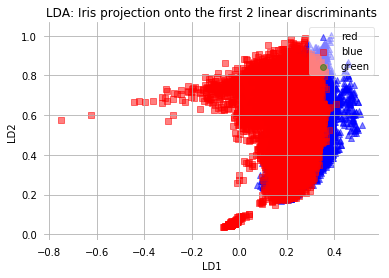

In [177]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

In [232]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(x_data, y_data)
print(type(X_lda_sklearn))
X = x_data
y = y_data
print(X.shape)
print(y.shape)
print(X_lda_sklearn.shape)
print(str(sklearn_lda.explained_variance_ratio_))

<class 'numpy.ndarray'>
(101814, 14)
(101814,)
(101814, 1)
[1.]


In [210]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,0][y == label] * -1, # flip the figure # Note X[:,1] does not exists from my lda of X
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


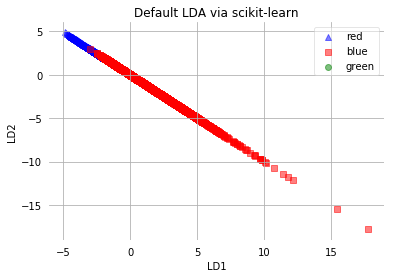

In [212]:
# plot_step_lda()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')